Дашборд: https://public.tableau.com/app/profile/anton.misyurevich

# Декомпозиция задач в проекте 

## Подготовка
1. Загрузить необходимые библиотеки
2. Для последующей аналитиченской работы необходимо загрузить датасеты, указав путь к ним

## Предобработка
1. Выявление дубликатов с последующим их удалением, либо преобразованиям к необходимому формату 
2. Обработка пропусков 
3. Преобразование типов данных к необходимому формату
4. Коррекция названий столбцов и приведение к нижнему регистру

## Исследовательский анализ данных
1. Анализ для определения - от каких источников привлечнеия клиентов приходит больше пользователей
2. Анализ затратной части для привлечения клиентов по типам источников
3. Анализ количества построенных зданий игроками в сравнении по типам источников 
4. Анализ  завершивших 1 уровень, как метрику вовлеченности в сравнении по типам источников

## Статистический анализ данных

1.  Гипотеза №1

 Н0  Время завершения уровня не различается в зависимости способа прохождения, как через реализацию проекта, так и через победу над первым игроком.
 
 H1  Время завершения уровня различается в зависимости способа прохождения, как через реализацию проекта, так и через победу над первым игроком.
 

2.  Гипотеза №2

 H0 Количество созданных объектов не различается в зависимости от стратегии прохождения
 
 H1 Количество созданных объектов различается в зависимости от стратегии прохождения
 

## Вывод. 

## Ответ на вопрос заказчика. Рекомендации

**Описание задачи**

Необходимо проанализировать поведения игроков в зависимости от источника перехода.

Провести исследовательский анализ данных. 

Узнать как ведут себя игроки в зависимости от источника перехода в игру.

Необходимо проверить несколько статистических гипотез. 


**Описание датасетов**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пробуют добиться успеха в деле колонизации галактики.

Основная монетизация игры пока только планируется. Однако уже сейчас предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Для завершения этого уровня игроку необходимо выполнить одного из двух условий:

- Победа над первым врагом
- Реализация проекта через разработку орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения (когорты пользователей), которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет game_actions.csv:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два дополнительных с информацией о рекламных активностях.

Датасет ad_costs.csv:
- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:
- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение




In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import datetime as dt
import math as mth
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv', parse_dates=['event_datetime'], dayfirst=True)
user_source = pd.read_csv('/datasets/user_source.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv', parse_dates=['day'], dayfirst=True)

# Предобработка данных

In [3]:
game_actions.head(10)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


In [4]:
user_source.head(10)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


In [5]:
ad_costs.head(10)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [6]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


Не берем в расчет пропущенные значения в столбцах project_type, building_type и event. 

(пропуски из-за механики сбора данных являются корректными и доп. обработки не требуют) 

In [7]:
#game_actions.head(10)
len(game_actions[game_actions['event'] == 'project'])

1866

In [8]:
game_actions_test_project = game_actions[game_actions['event'] == 'project']

game_actions_test_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 47121 to 135630
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_datetime  1866 non-null   datetime64[ns]
 1   event           1866 non-null   object        
 2   building_type   0 non-null      object        
 3   user_id         1866 non-null   object        
 4   project_type    1866 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 87.5+ KB


Проектов  с типом здания нет.

In [9]:
len(game_actions[game_actions['event'] == 'building'])

127957

In [10]:
game_actions_test_building = game_actions[game_actions['event'] == 'building']

game_actions_test_building.info()
#game_actions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127957 entries, 0 to 135637
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  127957 non-null  datetime64[ns]
 1   event           127957 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         127957 non-null  object        
 4   project_type    0 non-null       object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.9+ MB


Нет здание без типа здания. 

In [11]:
user_source.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Пропусков нет

In [12]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Пропусков нет

In [13]:
game_actions.duplicated().sum()


1

In [14]:
user_source.duplicated().sum()


0

In [15]:
ad_costs.duplicated().sum()


0

In [16]:
game_actions = game_actions.drop_duplicates()

Один дубликат. Удален

In [17]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%d')

Даты приведены к необходимому формату

***Произведена предобработка данных***

Обнаруженные пропуски обработаны.
Дубликатов нет.
Даты приведены к необходимому формату  

# Исследовательский анализ данных

**Анализ для определения - от каких источников привлечнеия клиентов приходит больше пользователей**

In [18]:
actions_with_source = game_actions.merge(user_source, on='user_id', how='left')

In [19]:
actions_with_source.head(3)

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts


In [20]:
sourse_top_count = actions_with_source.groupby('source').agg({'user_id':'nunique'})
                                
sourse_top_count = sourse_top_count.sort_values(by='user_id', ascending=False).reset_index()
sourse_top_count

,source,user_id
0,yandex_direct,4817
1,instagram_new_adverts,3347
2,facebook_ads,2726
3,youtube_channel_reklama,2686


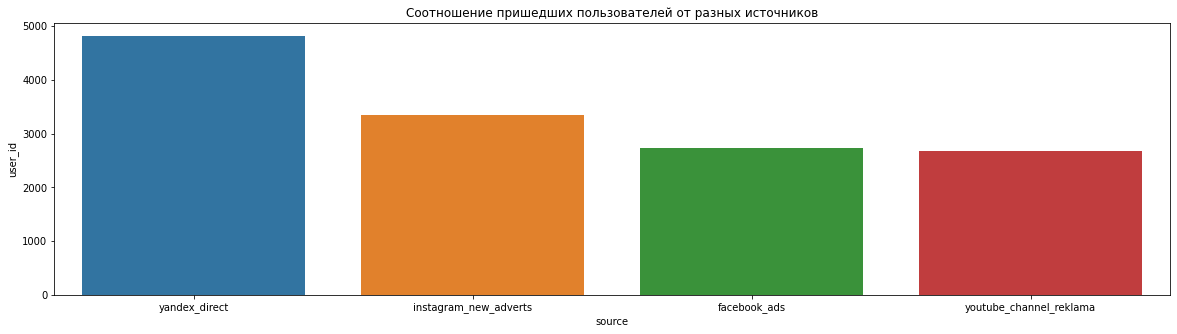

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=sourse_top_count['source'],y=sourse_top_count['user_id'])
plt.title('Соотношение пришедших пользователей от разных источников')
plt.show()

Наибольшее количество пользователей от yandex_direct, наименьшее от youtube_channel_reklama

 **Анализ затратной части для привлечения клиентов по типам источников (общие затраты и CAC)**

In [22]:

total_ad_costs = ad_costs.groupby('source').agg({'cost':'sum'}).round()\
                                .sort_values(by='cost', ascending=False)\
                                .reset_index()
                                
total_ad_costs

,source,cost
0,yandex_direct,2233.0
1,instagram_new_adverts,2161.0
2,facebook_ads,2141.0
3,youtube_channel_reklama,1068.0


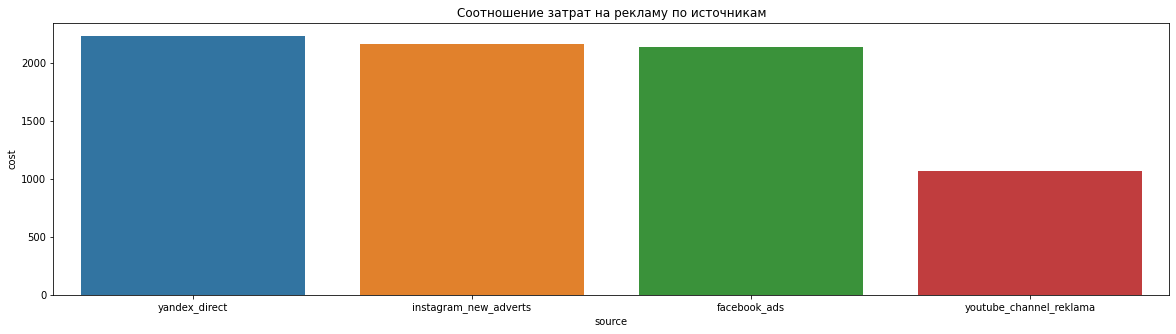

In [23]:
plt.figure(figsize=(20,5))
sns.barplot(x=total_ad_costs['source'],y=total_ad_costs['cost'])
plt.title('Соотношение затрат на рекламу по источникам')
plt.show()

Практически одинаковые инвестиции в каналы  yandex_direct, instagram_new_adverts и  facebook_ads. в 2 раза меньше заплатили  youtube_channel_reklama.

Данные полезны для рекомендаций пререраспределения средств, если это понадобится.

In [24]:
total_ad_costs['сас'] = (total_ad_costs['cost'] / sourse_top_count['user_id']).round(2)
total_ad_costs = total_ad_costs.sort_values(by='сас', ascending=False)
total_ad_costs

,source,cost,сас
2,facebook_ads,2141.0,0.79
1,instagram_new_adverts,2161.0,0.65
0,yandex_direct,2233.0,0.46
3,youtube_channel_reklama,1068.0,0.40


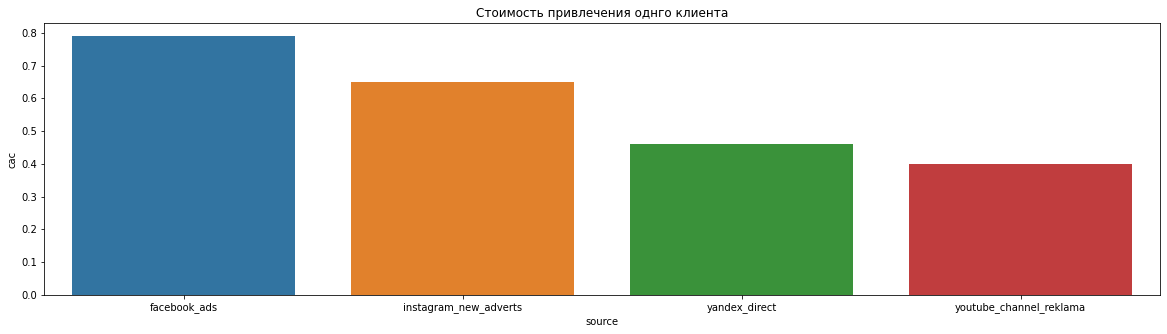

In [25]:
plt.figure(figsize=(20,5))
sns.barplot(x=total_ad_costs['source'],y=total_ad_costs['сас'])
plt.title('Стоимость привлечения однго клиента')
plt.show()

Стоимость  привлечения одного клиента выше у yandex_direct, затем следуеут instagram_new_adverts и yandex_direct. 

Учтем при формировании финальных выводов и рекомендаций

**Анализ количества построенных зданий игроками в сравнении по типам источников**

In [26]:

builds_total = actions_with_source.groupby('source').agg({'building_type':'count'}).round()\
                                .sort_values(by='building_type', ascending=False)\
                                .reset_index()
                                


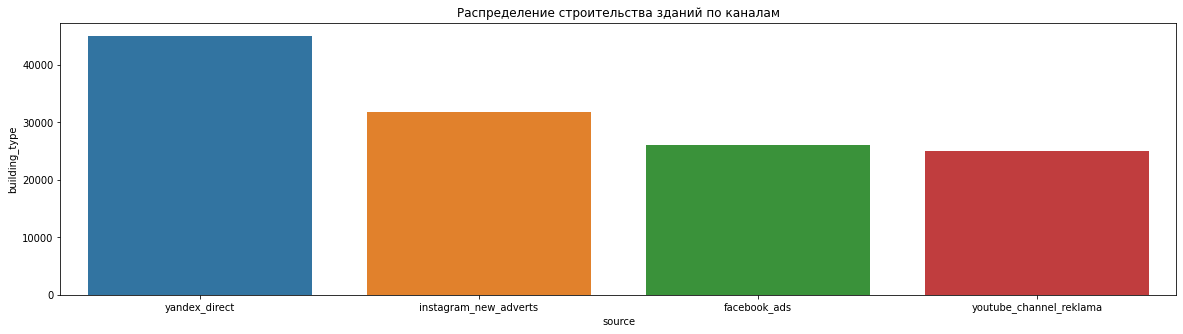

In [27]:
plt.figure(figsize=(20,5))
sns.barplot(x=builds_total['source'],y=builds_total['building_type'])
plt.title('Распределение строительства зданий по каналам')
plt.show()

In [28]:
builds_total['in_one_user'] = (builds_total['building_type']/sourse_top_count['user_id']).round(2)
builds_total

,source,building_type,in_one_user
0,yandex_direct,45032,9.35
1,instagram_new_adverts,31815,9.51
2,facebook_ads,26131,9.59
3,youtube_channel_reklama,24978,9.30


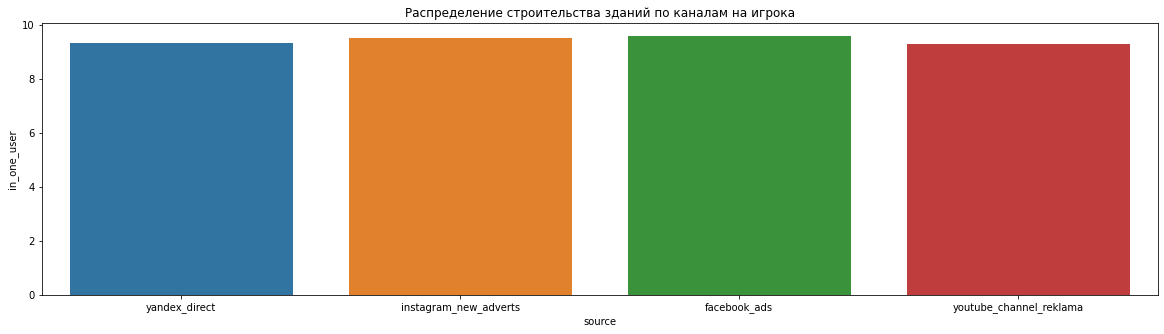

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(x=builds_total['source'],y=builds_total['in_one_user'])
plt.title('Распределение строительства зданий по каналам на игрока')
plt.show()

Строят игроки очень близкое по количеству значение зданий. 

**Анализ завершивших 1 уровень (вовлеченность в игру) в сравнении по типам источников**

In [30]:
actions_with_source_stage_1 = actions_with_source.loc[actions_with_source['event'] == 'finished_stage_1']

stage_1 = actions_with_source_stage_1.groupby('source').agg({'event':'count'})\
                                .sort_values(by='event', ascending=False)\
                                .reset_index()
                                
stage_1 = stage_1.rename(columns={'event': 'завершившие_1_уровень'})
stage_1

,source,завершившие_1_уровень
0,yandex_direct,2042
1,instagram_new_adverts,1466
2,youtube_channel_reklama,1159
3,facebook_ads,1150


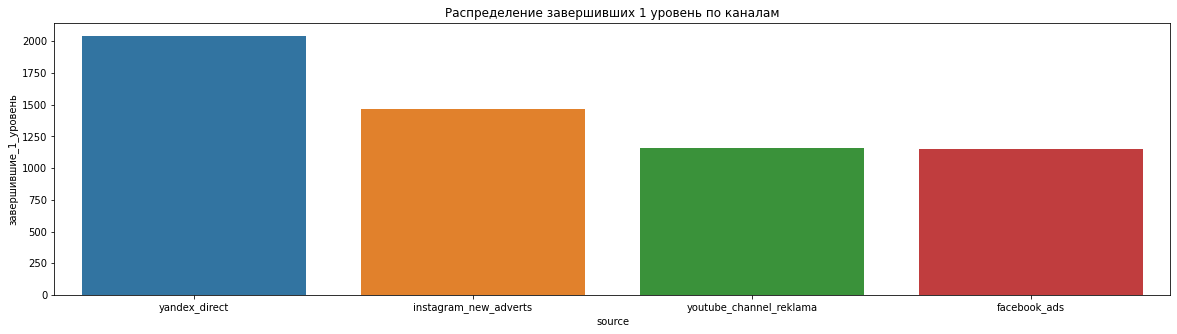

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x=stage_1['source'],y=stage_1['завершившие_1_уровень'])
plt.title('Распределение завершивших 1 уровень по каналам')
plt.show()

In [32]:
stage_1['завершившие_1_уровень_на_одного'] = (stage_1['завершившие_1_уровень']/sourse_top_count['user_id']).round(2)
stage_1

,source,завершившие_1_уровень,завершившие_1_уровень_на_одного
0,yandex_direct,2042,0.42
1,instagram_new_adverts,1466,0.44
2,youtube_channel_reklama,1159,0.43
3,facebook_ads,1150,0.43


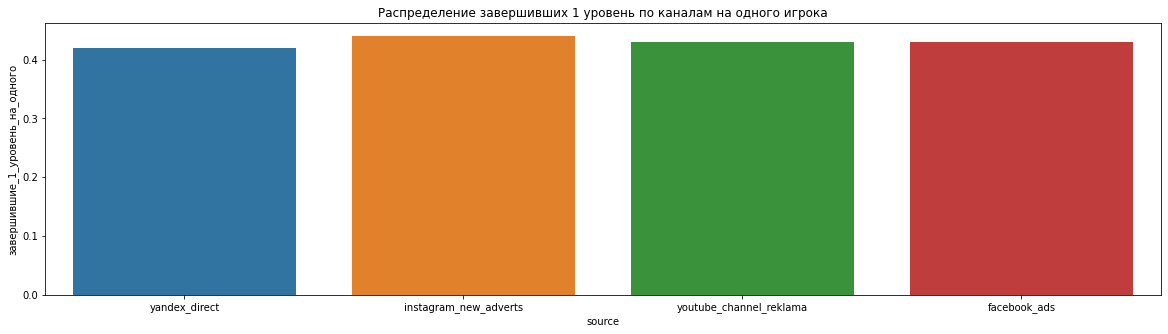

In [33]:
plt.figure(figsize=(20,5))
sns.barplot(x=stage_1['source'],y=stage_1['завершившие_1_уровень_на_одного'])
plt.title('Распределение завершивших 1 уровень по каналам на одного игрока')
plt.show()

Анализ показывает, что примерно одинаковая статистика у игроков по параметру "завершение 1 уровня"

# Статистический анализ данных

**Гипотеза 1**


Н0 Время завершения уровня не различается в зависимости способа прохождения, как через реализацию проекта, так и через победу над первым игроком.

H1 Время завершения уровня различается в зависимости способа прохождения, как через реализацию проекта, так и через победу над первым игроком.

In [34]:

last_date = actions_with_source.groupby('user_id').agg({'event_datetime':'max'}).reset_index()\
                           .rename(columns={'event_datetime': 'last_date'})
actions_with_source = actions_with_source.merge(last_date,on='user_id', how='left') 

actions_with_source['total_time'] = (actions_with_source['last_date'] - actions_with_source['event_datetime']).dt.days

hyp1_total_time = actions_with_source.drop(columns = ['event_datetime', 'event', 'building_type','source','last_date','project_type'],axis = 1)
hyp1_total_time.head()

,user_id,total_time
0,55e92310-cb8e-4754-b622-597e124b03de,6
1,c07b1c10-f477-44dc-81dc-ec82254b1347,11
2,6edd42cc-e753-4ff6-a947-2107cd560710,12
3,92c69003-d60a-444a-827f-8cc51bf6bf4c,8
4,cdc6bb92-0ccb-4490-9866-ef142f09139d,7


In [35]:
tolist_project = actions_with_source[actions_with_source['event'] == 'project']['user_id'].unique().tolist()
tolist_finished_stage_1 = actions_with_source[actions_with_source['event'] == 'finished_stage_1']['user_id'].unique().tolist()
fight = actions_with_source.query('user_id not in @tolist_project and event == "finished_stage_1"')
project = actions_with_source.query('user_id in @tolist_project and event == "finished_stage_1"')
fight['strategy'] = 'fight'
project['strategy']  = 'project'
with_fight_and_project = pd.concat([fight,project])
with_fight_and_project.head()


,event_datetime,event,building_type,user_id,project_type,source,last_date,total_time,strategy
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts,2020-05-04 19:47:29,0,fight
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,2020-05-05 13:22:09,0,fight
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,youtube_channel_reklama,2020-05-05 18:54:37,0,fight
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,youtube_channel_reklama,2020-05-05 21:27:29,0,fight
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,facebook_ads,2020-05-06 06:02:22,0,fight


In [36]:
actions_with_source_time = with_fight_and_project.merge(hyp1_total_time, on='user_id', how='left')
actions_with_source_time = actions_with_source_time.drop(columns = ['total_time_x'])
actions_with_source_time.head()

,event_datetime,event,building_type,user_id,project_type,source,last_date,strategy,total_time_y
0,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts,2020-05-04 19:47:29,fight,0
1,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts,2020-05-04 19:47:29,fight,0
2,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,instagram_new_adverts,2020-05-04 19:47:29,fight,0
3,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,2020-05-05 13:22:09,fight,1
4,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,facebook_ads,2020-05-05 13:22:09,fight,0


In [1]:
project_hyp1 = actions_with_source_time.query('strategy == "project"')
project_hyp1 = actions_with_source_time.groupby(['user_id', 'total_time_y'])['event'].count().reset_index()
project_hyp1 = project_hyp1['total_time_y']

NameError: name 'actions_with_source_time' is not defined

In [38]:
fight_hyp1 = actions_with_source_time.query('strategy == "fight"')
fight_hyp1 = fight_hyp1.groupby(['user_id', 'total_time_y'])['event'].count().reset_index()
fight_hyp1 = fight_hyp1['total_time_y']

In [39]:
alpha = 0.05

results = st.ttest_ind(project_hyp1, fight_hyp1)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.0898323458485065e-19
Отвергаем нулевую гипотезу


Заданое значение статистической значимости p-value превышено. Время завершения уровня различается  в зависимости способа прохождения, 
как через реализацию проекта, так и через победу над первым игроком.

**Гипотеза 2**


 H0 Количество созданных объектов не различается в зависимости от стратегии прохождения
 
 H1 Количество созданных объектов различается в зависимости от стратегии прохождения

In [40]:
tolist_hyp2_1 = actions_with_source[actions_with_source['event'] == 'project']['user_id'].unique().tolist()
tolist_hyp2_2 = actions_with_source[actions_with_source['event'] == 'finished_stage_1']['user_id'].unique().tolist()
fight_hyp2 = actions_with_source.query('user_id not in @tolist_hyp2_1 and user_id in @tolist_hyp2_2 and event == "building"')
fight_hyp2 = fight_hyp2.groupby('user_id')['building_type'].count().reset_index()
fight_hyp2 = fight_hyp2['building_type']

In [41]:
project_hyp2 = actions_with_source.query('user_id in @tolist_hyp2_1 and user_id in @tolist_hyp2_2 and event == "building"') 
project_hyp2 = project_hyp2.groupby('user_id')['building_type'].count().reset_index()
project_hyp2 = project_hyp2['building_type']


In [42]:
alpha = 0.05
results = st.ttest_ind(fight_hyp2, project_hyp2)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Различия присутствую -значимые. Количество построенных объектов к  выбору стратегии прохождения первого уровня. 
Результат с вероятностью 0% может быть случайно получен.

# Вывод

Получены 3 датасэта. Данные представлены о результатах игры пользователя на первом уровне. 
Выполнение одного из условий (победа в сражении или реализация проекта) дает возможность завершить первый уровень.
В результате предобработки были выявлены пропуски, удалять необходимости нет.
В столбце event стоит запись - project, тогда  в колонке project_type будет стоять отметка satellite_orbital_assembly. 
В остальных стоит пропуск. Удален дубликат. 

Далее произведен анализ данных.
Из 4-х источников **общего количества привлечения пользователей** располагаются в следующей последовательности: 
1. yandex_direct -  **4817** уникальных пользователей
2. instagram_new_adverts - **3347** уникальных пользователей	
3. facebook_ads - **2726** уникальных пользователей
4. youtube_channel_reklama -**2686** уникальных пользователей

С отрывом в треть идет yandex_direct, остальные с небольшим отрывом между собой.

Следующая метрика - **соотношение затрат по источникам**. 

Градация выглядит подобным образом, но с некоторыми отличиями в значениях.
Практически одинаковыые траты в строну первых треъ компаний. 
Примерно в 2 раза меньше инвестиций в youtube_channel_reklama.

1. yandex_direct -  **2233** уе
2. instagram_new_adverts - **2161**	уе
3. facebook_ads - **2141** уе
4. youtube_channel_reklama -**1068** уе

Следующая метрика - **стоимость привлечения одного клиента (САС)**.

Клиент от facebook_ads оказался самым дорогим - разница со стоимостью клиента от youtube_channel_reklama в 2 раза.
Это мощный аргумент на понижение общего условного рейтинга при оформлении рекомендаций для распределения будущего бюджета на рекламу.


1. facebook_ads -  **0.08** уе
2. instagram_new_adverts - **0.06** уе
3. yandex_direct  -  **0.05** уе
4. youtube_channel_reklama -  **0.04** уе

Следующая метрика  - **количества построенных зданий игроками в сравнении по типам источников**
facebook_ads - претендент, как минимум, на коррекцию договорных отношений с ним. **(Связано с общим количеством пришедших клиентов)** 

1. yandex_direct	- **45032**
2. instagram_new_adverts  -	**31815**
3. facebook_ads	 - **26131** 
4. youtube_channel_reklama	 - **24978**

Следующая метрика - **количество завершивших 1 уровень (вовлеченность в игру)**
Ситуация схожая с предыдущими. **(Связано с общим количеством пришедших клиентов)** 

1.  yandex_direct	-  **2042**
2.	instagram_new_adverts  - **1466**
3.	youtube_channel_reklama	- **1159**
4.	facebook_ad  -  **1150**


**Исследования в разрезе на одного игрока показывают, что  все каналы имеют, примерно, схожую статистику, как по количеству построенных зданий игроками в сравнении по типам источников на 1 игрока, так и по количеству завершивших 1 уровень (вовлеченность в игру) на 1 игрока.** 





В результате независимого двухвыборочного теста была просчитана вероятность гипотезы о том, что время завершения уровня не различается в зависимости способа прохождения (через реализацию проекта или через победу над первым игроком). Гипотеза не подтвердилась. 

Не подтвердилась и гипотеза о том, что количество созданых объектов не различается от стратегии, которую выберет игрок.
Различия есть.


**Рекомендации**

Анализ показал необходимость перераспределения средств.  

С **facebook_ad**  на **youtube_channel_reklama**. **youtube_channel_reklama** имеет наименьший САС. Результат привлечения клиентов у него не высок по причине урезанных инвестиций в его сторону. **facebook_ad** имеет наибольший САС при тех же расходах, что и оба лидера. 
    По лидерам (**yandex_direct** и **youtube_channel_reklama**) коррекция возможна через какое-то время и после следующего анализа показателей через 2-4 недели.
    
    
    
**Приоритет по рейтингу каналов по эффективности вложений**  


1.  yandex_direct
2.  youtube_channel_reklama
3.	instagram_new_adverts
4.	facebook_ad 
